In [3]:
!git clone https://github.com/imostafizur/CSE498R.git

fatal: destination path 'CSE498R' already exists and is not an empty directory.


# Pneumonia Detection with Resnet50

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
image = ('Pneumonia')

In [6]:
# Count the number of images in Pneumonia and Normal folders
print('Total number of images in Pneumonia folder:', len(os.listdir('Pneumonia')))
print('Total number of images in Normal folder:', len(os.listdir('Pneumonia/NORMAL')))
print('Total number of images in Pneumonia folder:', len(os.listdir('Pneumonia/PNEUMONIA')))

Total number of images in Pneumonia folder: 2
Total number of images in Normal folder: 1342
Total number of images in Pneumonia folder: 3876


In [7]:
# Create a data generator for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create a training set
train_set = train_datagen.flow_from_directory('Pneumonia', target_size=(224, 224), batch_size=32, class_mode='binary')

# Create a validation set
val_set = val_datagen.flow_from_directory('Pneumonia', target_size=(224, 224), batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [8]:
# Create a ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94781440/94765736 [==============================] - 0s 0us/step


In [9]:
# Freeze the layers of the model
for layer in base_model.layers:
    layer.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

# Create a model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Create a checkpoint
checkpoint = ModelCheckpoint('Pneumonia_Resnet50.h5', monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

# Create an early stopping
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
# Train the model
history = model.fit(train_set, validation_data=val_set, epochs=50, callbacks=[checkpoint, early])

Epoch 1/50
163/163 [==============================] - ETA: 0s - loss: 0.5409 - accuracy: 0.7418
Epoch 1: val_accuracy improved from -inf to 0.74291, saving model to Pneumonia_Resnet50.h5
163/163 [==============================] - 162s 903ms/step - loss: 0.5409 - accuracy: 0.7418 - val_loss: 0.4989 - val_accuracy: 0.7429
Epoch 2/50
163/163 [==============================] - ETA: 0s - loss: 0.4915 - accuracy: 0.7498
Epoch 2: val_accuracy improved from 0.74291 to 0.76208, saving model to Pneumonia_Resnet50.h5
163/163 [==============================] - 146s 900ms/step - loss: 0.4915 - accuracy: 0.7498 - val_loss: 0.4525 - val_accuracy: 0.7621
Epoch 3/50
163/163 [==============================] - ETA: 0s - loss: 0.4601 - accuracy: 0.7697
Epoch 3: val_accuracy did not improve from 0.76208
163/163 [==============================] - 145s 889ms/step - loss: 0.4601 - accuracy: 0.7697 - val_loss: 0.4385 - val_accuracy: 0.7523
Epoch 4/50
163/163 [==============================] - ETA: 0s - loss: 0

In [14]:
# Accuracy print
print('Accuracy of the model is - ' , model.evaluate(val_set)[1]*100 , '%')

163/163 [==============================] - 56s 343ms/step - loss: 0.2425 - accuracy: 0.9007
Accuracy of the model is -  90.06901979446411 %


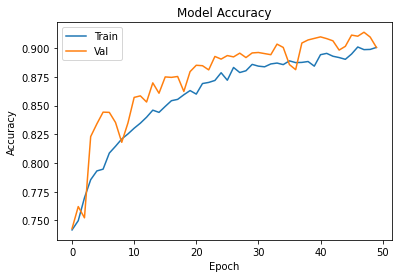

In [11]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


Text(0, 0.5, 'Loss')

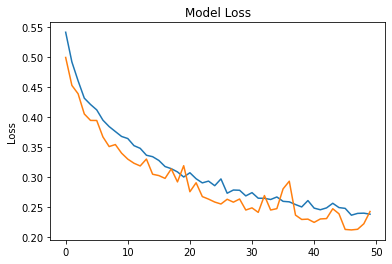

In [12]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')

In [13]:
# Save the model
model.save('Pneumonia_Resnet50.h5')